
# Análisis de Datos con el Dataset de Netflix

Este cuaderno tiene como objetivo explorar y visualizar los datos del catálogo de Netflix usando Python, Pandas y Matplotlib.

---


## 1. Cargar y visualizar el dataset

In [9]:

# Subir archivo localmente en Google Colab
from google.colab import files
uploaded = files.upload()


Saving netflix_titles.csv to netflix_titles (1).csv


In [10]:

# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv('netflix_titles.csv')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 2. Exploración inicial del dataset

In [11]:

# Ver forma y columnas
print("Filas y columnas:", df.shape)
df.columns


Filas y columnas: (8807, 12)


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:

# Información general del dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [13]:

# Estadísticas descriptivas básicas
df.describe(include='all')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


## 3. Limpieza básica del dataset

In [14]:

# Revisar valores nulos
df.isnull().sum()


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [15]:

# Convertir 'date_added' a datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
# Crear nueva columna con el año
df['year_added'] = df['date_added'].dt.year


## 4. Visualización de datos

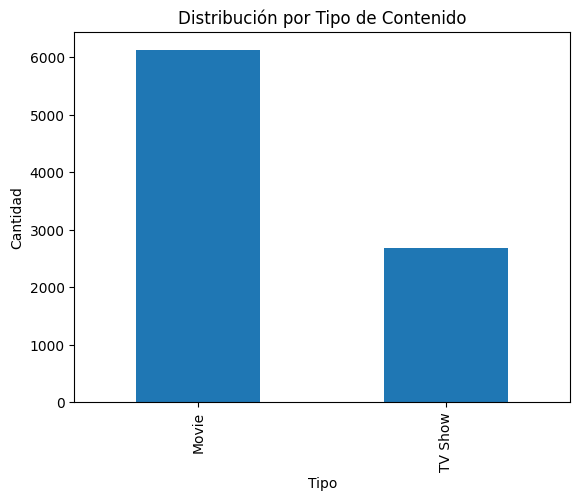

In [16]:

# Distribución por tipo
df['type'].value_counts().plot(kind='bar', title='Distribución por Tipo de Contenido')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.show()


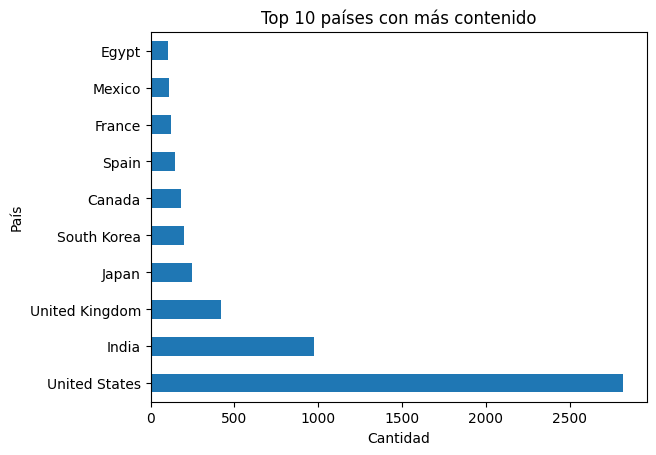

In [17]:

# Top 10 países con más contenido
df['country'].value_counts().head(10).plot(kind='barh', title='Top 10 países con más contenido')
plt.xlabel('Cantidad')
plt.ylabel('País')
plt.show()


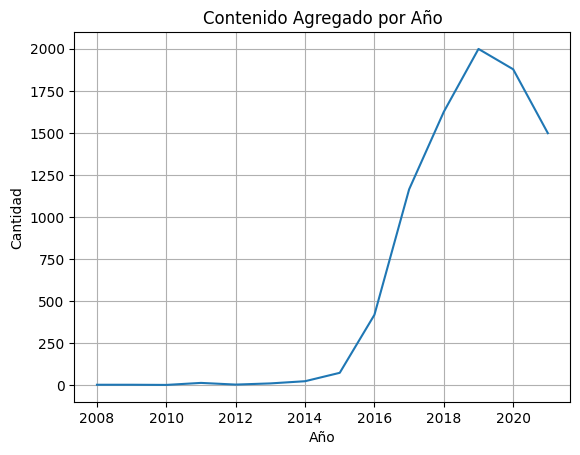

In [18]:

# Contenido agregado por año
df['year_added'].value_counts().sort_index().plot(kind='line', title='Contenido Agregado por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.grid(True)
plt.show()


## 5. Actividad adicional

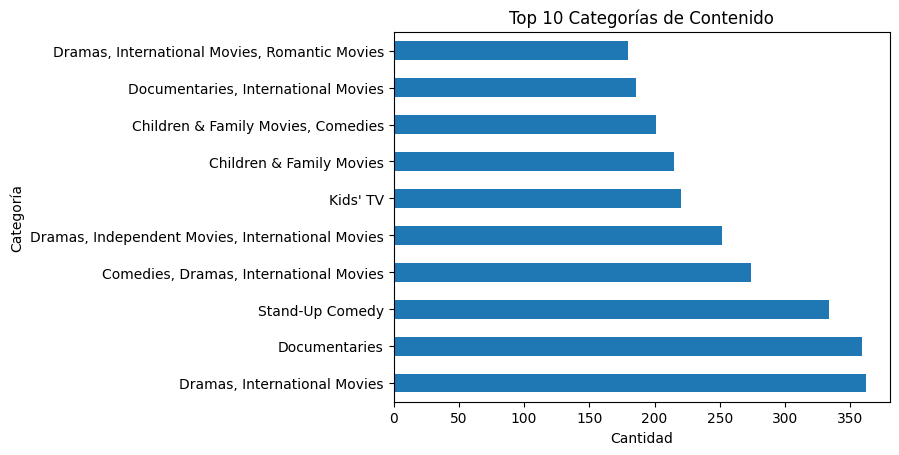

In [19]:

# Conteo por género principal (columna 'listed_in')
df['listed_in'].value_counts().head(10).plot(kind='barh', title='Top 10 Categorías de Contenido')
plt.xlabel('Cantidad')
plt.ylabel('Categoría')
plt.show()
